# Horse Or Human -- Testing

This notebook is used to validate the CNN model constructed in `Model_Training.ipynb`.

## Data Preprocessing

In [1]:
# Import libraries
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
# Apply scaling and augmentations (zooms, rotate, flip, etc.) to training set 
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
training_set = train_datagen.flow_from_directory('horse-or-human/train', target_size=(64, 64), batch_size=32, class_mode='binary')
# Apply scaling to test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('horse-or-human/validation', target_size=(64, 64), batch_size=32, class_mode='binary')

Using TensorFlow backend.
Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## Importing the CNN

In [2]:
# Import libraries
import tensorflow as tf
from keras.models import model_from_json
# Load model JSON
json_file = open('FinalModel.json', 'r')
cnn_json = json_file.read()
json_file.close()
cnn = tf.keras.models.model_from_json(cnn_json)
# Load Weights
cnn.load_weights('FinalModel.hdf5')
# Compile CNN
cnn.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

## CNN Accuracy

In [3]:
# Print training and testing accuracies
train_accuracy = cnn.evaluate(training_set)
print("Training accuracy: ", train_accuracy[1])
test_accuracy = cnn.evaluate(test_set)
print("Testing accuracy: ", test_accuracy[1])

  ...
    to  
  ['...']
33/33 [==============================] - 5s 150ms/step - loss: 0.2430 - accuracy: 0.9221
Training accuracy:  0.9221032
  ...
    to  
  ['...']
8/8 [==============================] - 0s 60ms/step - loss: 0.4615 - accuracy: 0.8672
Testing accuracy:  0.8671875


## Internet Image Predictions

Now that we know the model's accuracy on the training/testing datasets. Let's see how the model classifies random images I find on the internet.

Here's a [horse](https://a57.foxnews.com/static.foxnews.com/foxnews.com/content/uploads/2019/12/931/524/horse.jpg?ve=1&tl=1):

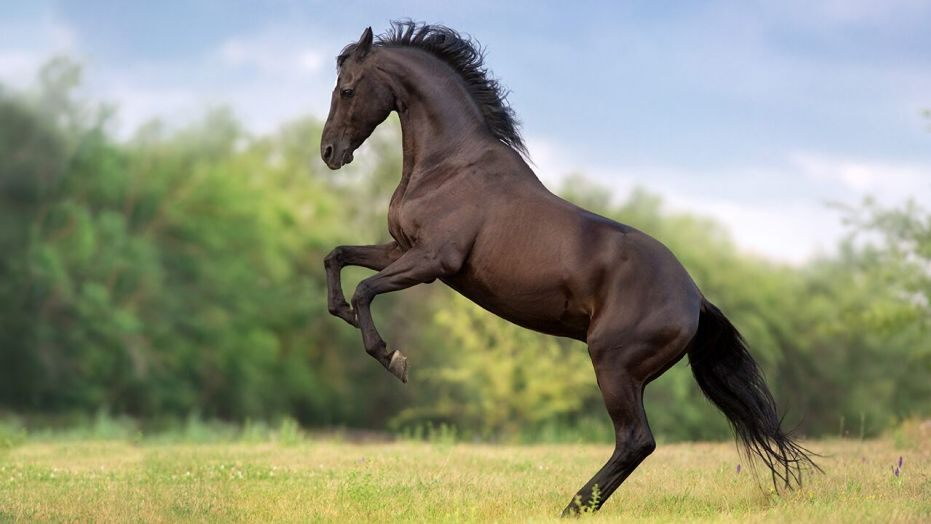

In [4]:
from IPython.display import Image
Image(filename='images/horse_human_1.jpg')

In [5]:
# Import libraries
import numpy as np
from keras.preprocessing import image
# Format image for compatibility
test_image = image.load_img('images/horse_human_1.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
# Predict image
result = cnn.predict(test_image)
if result[0][0] == 1:
    prediction = 'Prediction: horse'
else:
    prediction = 'Prediction: human'
print(prediction)

Prediction: horse


Nice! Next, we'll see how the model performs on this picture of a [human](https://images.unsplash.com/photo-1570929489374-dc835d19575a?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&w=1000&q=80):

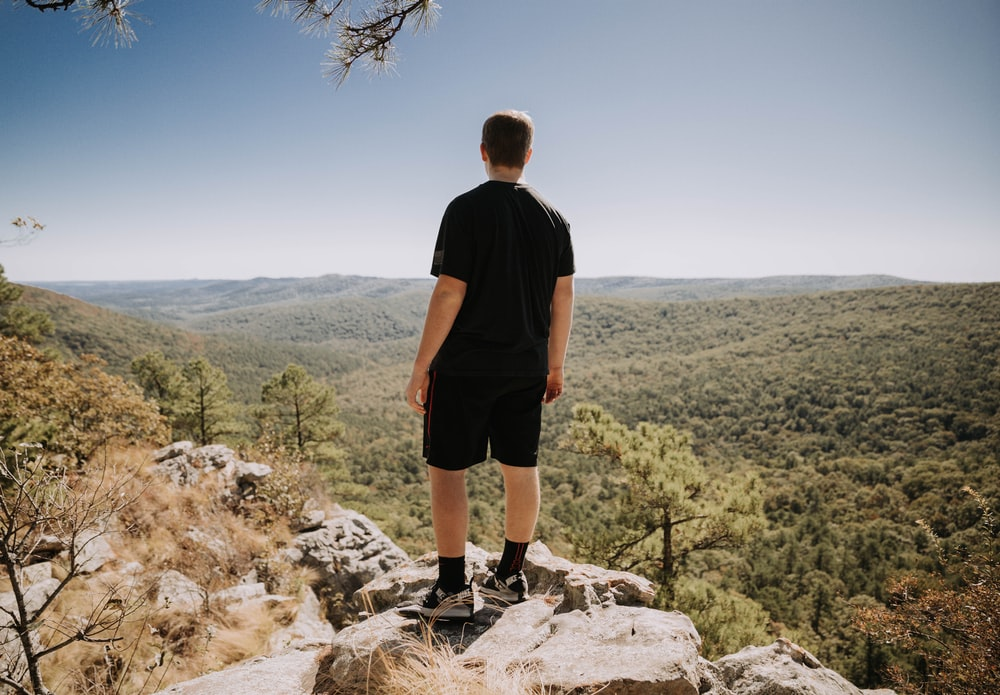

In [6]:
from IPython.display import Image
Image(filename='images/horse_human_2.jpg')

In [7]:
# Format image for compatibility
test_image = image.load_img('images/horse_human_2.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
# Predict image
result = cnn.predict(test_image)
if result[0][0] == 0:
    prediction = 'Prediction: horse'
else:
    prediction = 'Prediction: human'
print(prediction)

Prediction: human


Seeing the testing and training accuracies, the model shows some promise. However, there are clearly some limitations. Check out the `README.md` for more discussion.